In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
data_loc = '/content/drive/MyDrive/Mobile Price Classification/train.csv'
df = pd.read_csv(data_loc)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

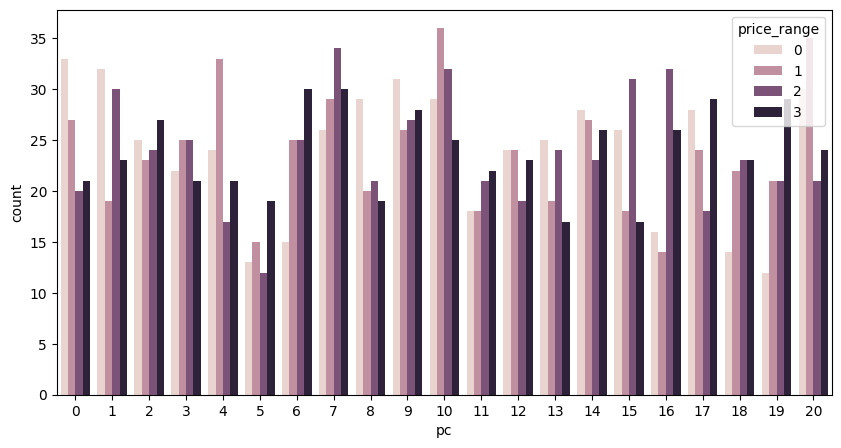

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x= 'pc', hue = "price_range")
plt.show()

In [ ]:
df.clock_speed.unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

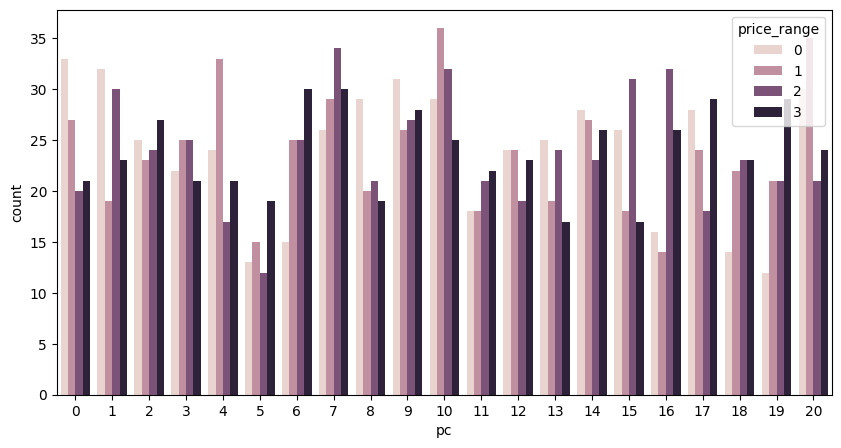

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'pc', hue = 'price_range')
plt.show()

In [ ]:
df.ram.unique()

array([2549, 2631, 2603, ..., 2032, 3057, 3919])

In [ ]:
df.three_g.unique()

array([0, 1])

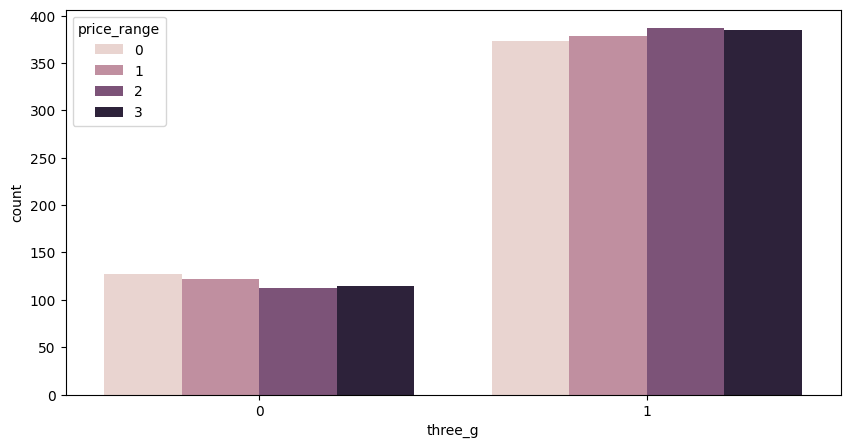

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'three_g', hue = 'price_range')
plt.show()

In [ ]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

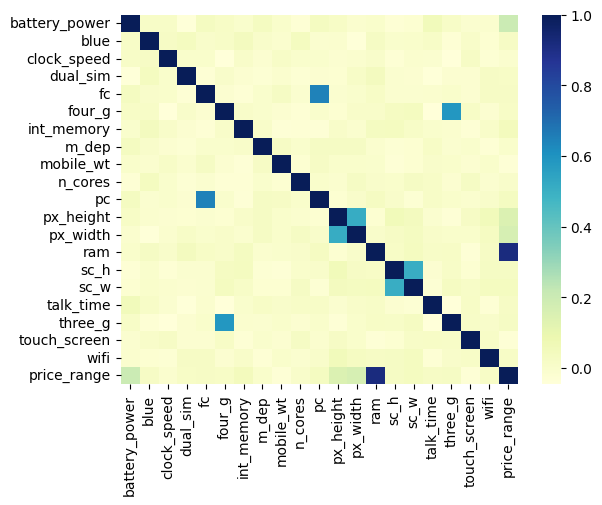

In [ ]:
sns.heatmap(df.corr(), cmap = 'YlGnBu')

<Axes: xlabel='price_range', ylabel='ram'>

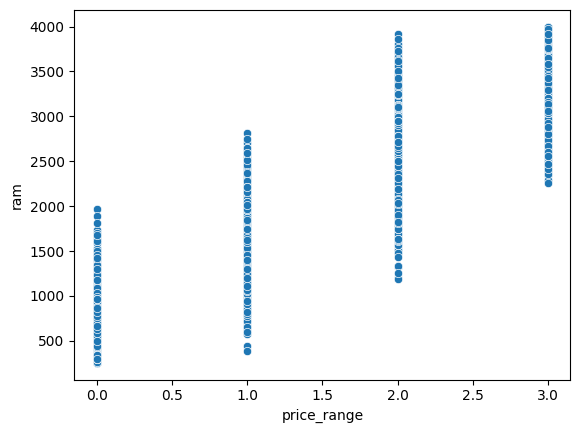

In [ ]:
sns.scatterplot(data = df, x = 'price_range', y = 'ram')

In [ ]:
selected_col = []
for col in df.columns:
  corr, p_value = spearmanr(df["price_range"], df[col])
  print(f"{col} :  {corr} - {p_value}")
  if p_value <= 0.1 and col != "price_range":
    selected_col.append(col)

battery_power :  0.19999095450908858 - 1.7223057044179651e-19
blue :  0.02057285406141849 - 0.3577984898948863
clock_speed :  -0.005436141356967046 - 0.8080352698801724
dual_sim :  0.017444479237224732 - 0.4355601630195083
fc :  0.024166831194135433 - 0.2800283622070244
four_g :  0.014771711417239406 - 0.5091036529765862
int_memory :  0.04427752850862638 - 0.04771653000554717
m_dep :  -0.0003218393921890176 - 0.9885235466145562
mobile_wt :  -0.030214005836468483 - 0.17679955873002617
n_cores :  0.004651406909122466 - 0.83531617148015
pc :  0.03282366022033268 - 0.1422682590465307
px_height :  0.13188410283565175 - 3.2150109040420085e-09
px_width :  0.1651336945326619 - 1.0740563666925509e-13
ram :  0.9170797841496084 - 0.0
sc_h :  0.023726584744656682 - 0.2888848842628786
sc_w :  0.024775829231710497 - 0.2680838379943398
talk_time :  0.022137565690070568 - 0.3224066623403745
three_g :  0.023611216880045027 - 0.29123661631673065
touch_screen :  -0.030411071898217987 - 0.1739917985944933

In [ ]:
selected_col

['battery_power', 'int_memory', 'px_height', 'px_width', 'ram']

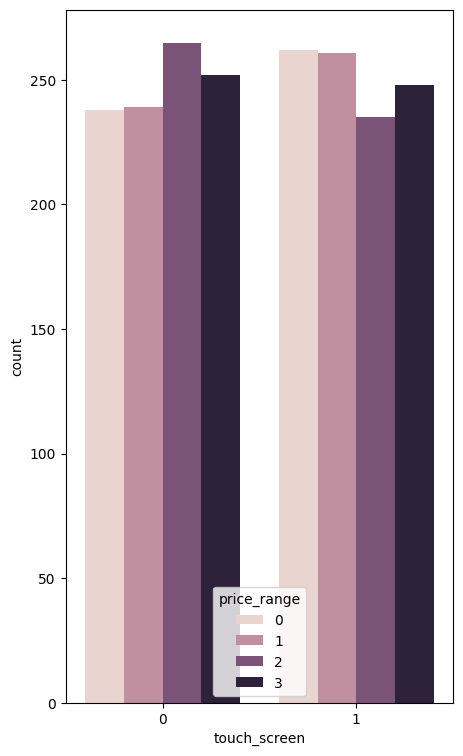

In [ ]:
plt.figure(figsize = (5,9))
sns.countplot(data = df, x = 'touch_screen', hue = 'price_range')
plt.show()

In [ ]:
y = df['price_range']
X = df[selected_col]

In [ ]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state = 42)

In [ ]:
X_train.head()

,battery_power,int_memory,px_height,px_width,ram
836,902,63,364,1360,3654
575,1197,20,214,1710,2885
557,1519,32,168,1239,2912
1235,1971,40,485,922,571
1360,882,28,248,884,751


In [ ]:
X_train.shape

(1400, 5)

In [ ]:
X_train.head()

,battery_power,int_memory,px_height,px_width,ram
836,902,63,364,1360,3654
575,1197,20,214,1710,2885
557,1519,32,168,1239,2912
1235,1971,40,485,922,571
1360,882,28,248,884,751


In [ ]:
# scaler = MinMaxScaler()
# scaled_X = scaler.fit_transform(X_train)

In [ ]:
scaled_X

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 1.        ,
        0.33333333],
       [0.34736139, 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.04141617, 1.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 0.        ,
        1.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
my_input_dim = X_train.shape[1]

In [ ]:
net_arr = [
   Dense(32, activation = 'relu', input_dim = my_input_dim),
   Dense(16, activation= 'relu'),
   Dense(1, activation = 'sigmoid')
  ]
deep_model = Sequential(net_arr)

deep_model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

deep_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 737 (2.88 KB)
Trainable params: 737 (2.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
def fitting(x,y,z):
  return deep_model.fit(x,y, epochs=z, validation_split=0.2)

In [ ]:
fitting(X_train, y_train, 10)

Epoch 1/10
35/35 [==============================] - 1s 9ms/step - loss: -1226.4890 - accuracy: 0.2509 - val_loss: -1926.9723 - val_accuracy: 0.2607
Epoch 2/10
35/35 [==============================] - 0s 3ms/step - loss: -3179.4114 - accuracy: 0.2509 - val_loss: -4368.2251 - val_accuracy: 0.2607
Epoch 3/10
35/35 [==============================] - 0s 3ms/step - loss: -6481.6841 - accuracy: 0.2509 - val_loss: -8464.0703 - val_accuracy: 0.2607
Epoch 4/10
35/35 [==============================] - 0s 3ms/step - loss: -12282.2344 - accuracy: 0.2509 - val_loss: -15504.1104 - val_accuracy: 0.2607
Epoch 5/10
35/35 [==============================] - 0s 3ms/step - loss: -21960.1113 - accuracy: 0.2509 - val_loss: -27347.4395 - val_accuracy: 0.2607
Epoch 6/10
35/35 [==============================] - 0s 3ms/step - loss: -37411.5859 - accuracy: 0.2509 - val_loss: -45430.2656 - val_accuracy: 0.2607
Epoch 7/10
35/35 [==============================] - 0s 4ms/step - loss: -60091.5703 - accuracy: 0.2509 - v

In [ ]:
LR = LogisticRegression()

In [ ]:
grid_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'solver': ['liblinear', 'lbfgs']}

In [ ]:
GS = GridSearchCV(LR, grid_parameters, cv = 5)

In [ ]:
GS.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']})

In [ ]:
best_performance = GS.best_estimator_

In [ ]:
y_test

1860    0
353     2
1333    1
905     3
1289    1
       ..
148     2
1554    1
1956    0
925     1
942     0
Name: price_range, Length: 600, dtype: int64

In [ ]:
predicted_y = best_performance.predict(X_test)

In [ ]:
best_performance.score(X_test, y_test)

0.845

In [ ]:
best_performance.score(X_train, y_train)

0.8442857142857143

In [ ]:
RF = RandomForestRegressor()

In [ ]:
RF_grid_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 8, 12],
    'min_samples_split': [2, 5, 10],
}

In [ ]:
RF_GS = GridSearchCV(RF, RF_grid_parameters, cv = 5)

In [ ]:
RF_GS.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 12],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_RF = RF_GS.best_estimator_

In [ ]:
RF_predicted_y = best_RF.predict(X_test)

In [ ]:
best_RF.score(X_test, y_test)

0.942939069181231

In [ ]:
best_RF.score(X_train, y_train)

0.9894716076517514

In [ ]:
data = pd.DataFrame([[500, 256, 1612, 720, 8192],[500, 256, 2340, 1080, 12288]])
best_RF.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([2.84047619, 2.935     ])